# Business Understanding

## Wie (de opdrachtgever)? 

Appbakkers (Corné & Guido) is een bedrijf die (mobiele) applicaties ontwikkeld.  

## Wat (de opdracht)? 

Bij opname van een patiënt wordt er een elektrocardiogram (ECG) gemaakt. Hierbij worden alle elektrische impulsen in het hart geregistreerd, waardoor kan worden afgeleid welke gebieden van het hart naar behoren functioneren.  

Arts-onderzoekers vragen zich af of het aantal hartslagen per minuut een goede voorspeller kan zijn van de calciumscore. Gebruik de ECG-datasets om per dataset het gemiddelde aantal hartslagen per minuut te bepalen (bedenk goed welke onderdelen van de ECGs je hiervoor allemaal gaat gebruiken): indien deze boven de 100 slagen per minuut is heet dit tachycardie, indien deze onder de 60 slagen per minuut is heet dit bradycardie.  

Onderzoek daarna met deze resultaten en de calciumscore uitkomsten of de aanwezigheid van bradycardie/tachycardie/normale hartslag (en meer specifiek het aantal hartslagen per minuut) de calciumscore kan voorspellen. Bepaal hierna of de datasets een regelmatig of onregelmatig hartritme vertonen en probeer je model hiermee te verbeteren. Kan je model nu accuraat de calciumscore voorspellen? Zijn er risico’s bij het gebruik van je model in de praktijk? Als je nog tijd over hebt, is het interessant om je gegevens te combineren met die van opdracht 1. Kan je elkaars modellen verder verbeteren?

## Wanneer (tijdsframe)? 

Deze opdracht voeren we uit vanaf 13 april ’22. Op deze dag hebben we de kennismaking gehad met onze opdrachtgever. Hierin hebben we de opdracht besproken en een aantal afspraken gemaakt. De einddatum van de opdracht zal zijn op 3 juni ’22. 

## Waarom (doel)? 

Het doel is om te achterhalen of hartslag een goede voorspeller kan zijn van de calciumscore. 

Als het model gemaakt is om dit te voorspellen kan deze verbeterd/uitgebreid worden met de resultaten en de calciumscore uitkomsten of de aanwezigheid van bradycardie/tachycardie/normale hartslag (en meer specifiek het aantal hartslagen per minuut) de calciumscore kan voorspellen.  

## Wat (wat gaan we gebruiken)? 

Door middel van Jupyter notebooks gaan wij het model ontwikkelen.  
ECG viewer om ECG´s bestanden door te lezen. 

# Data Understanding

Wij hebben 2 publieke datasets gekregen om mee bezig te gaan. Deze zijn "cardio_train.csv" en "riskchartsampledata.xlsx". Hieronder is te lezen wat de kolommen in deze datasets betekenen.

### "cardio_train.csv"

* id          
    De id van de rij, **integer** <br/>
* age         
    De leeftijd van de patient in dagen, **integer** <br/>
* gender      
    Het geslacht van de patient, waarbij 1 een man is en 2 een vrouw, **category** <br/>
* height      
    De lengte van de patient, gegeven in centimeters, **integer** <br/>
* weight      
    Het gewicht van de patient, gegeven in kilogram, **float** <br/>
* ap_hi       
    De bovendruk van de patient, **integer**  <br/>
* ap_lo       
    De onderdruk van de patient, **integer**  <br/>
* cholesterol <br/>
    Hoe veel cholesterol de patient heeft, **category**  <br/>
* gluc        
    Hoe veel glucoses de patient heeft, **category**  <br/>
* smoke       
    Of de patient rookt, **boolean** <br/>
* alco        
    Of de patient alcohol drinkt, **boolean** <br/>
* active      
    Of de patient actief is in het dagelijks leven, **boolean** <br/>
* cardio      
    Of de patient een cardiovasculaire ziekte heeft, **boolean** <br/>

### "riskchartsampledata.xlsx"

* Age         
    De leeftijd van de patient, gegeven in leeftijdsgroep, **category** <br/>
* Sex         
    Geslacht van de patient, **category** <br/>
* Family history of CVD      
    Of er een CVD in de family is/was, **boolean** <br/>
* Diabetes Mellitus      
    Of de patient diabetes heeft, **category** <br/>
* High WHR <br/>
    De Waist to hip ratio van de patient, waarbij bij vrouwen Yes is als het hoger is dan 0.8, en bij mannen hoger dan 0.95, **boolean** <br/>
* Smoking status       
    Of de patient rookt, **boolean**  <br/>
* SBP       
    De systolische bloeddruk van de patient, **category**  <br/>
* Tch <br/>
    De totale cholesterol van de patient, **category**  <br/>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
cardio_train = pd.read_csv("Data/cardio_train.csv", delimiter=';')
riskchart = pd.read_excel("Data/riskchartsampledata.xlsx", true_values=['Yes','Diabetes','Smoker'], false_values=['No','Non-diabetes','Non-smoker'])

In [3]:
report1 = pp.ProfileReport(cardio_train, progress_bar=False)
report1.to_file('report1.html')

report2 = pp.ProfileReport(riskchart, progress_bar=False)
report2.to_file('report2.html')

[Report van cardio_train](report1.html)

[Report van riskchart](report2.html)

In [4]:
#sns.pairplot(cardio_train)

In [5]:
#sns.pairplot(riskchart)

## Gender in cardio_train

In [6]:
cardio_train[['gender','height']].groupby('gender').agg(np.mean)

,height
gender,
1,161.355612
2,169.947895


De personen met 2 als gender zijn gemiddeld langer, dus is de 2 een man en 1 een vrouw.

# Data Preparation

In [7]:
#cardio_train.astype({'gender':'category','cholesterol':'category','gluc':'category','smoke':'bool','alco':'bool','active':'bool','cardio':'bool'}, copy=False)

In [8]:
riskchart.astype({'Age':'category','Sex':'category','SBP':'category','Tch':'category'},copy=False)

,Age,Sex,Family history of CVD,Diabetes Mellitus,High WHR,Smoking status,SBP,Tch
0,55-64,male,False,True,False,True,120-139 mmHg,150-200 mg/dL
1,65-74,male,False,True,False,False,140-159 mmHg,<150 mg/dL
2,65-74,female,False,False,True,False,>=160 mmHg,250-300 mg/dL
3,65-74,male,False,True,True,True,>=160 mmHg,200-250 mg/dL
4,65-74,male,False,False,True,False,>=160 mmHg,150-200 mg/dL
...,...,...,...,...,...,...,...,...
495,55-64,female,False,False,True,False,>=160 mmHg,250-300 mg/dL
496,45-54,female,False,False,True,False,<120 mmHg,200-250 mg/dL
497,45-54,male,False,False,True,False,120-139 mmHg,<150 mg/dL
498,35-44,female,False,False,True,False,<120 mmHg,250-300 mg/dL


## Aanpassen van data

In [9]:
#if (1 in cardio_train['gender'].unique()):
#    cardio_train['gender'] = ['male' if x is 2 else 'female' for x in cardio_train['gender']]
#cardio_train.astype('category',copy=False)


#cardio_train['age_category'] = pd.cut(cardio_train['age_in_years'], range(5,105,10))
#age_cat = [str(x.left) + '-' + str(x.right-1) for x in cardio_train['age_category']]
#cardio_train['age_category'] = age_cat
#cardio_train['age_category'].astype('category',copy=False)

In [10]:
cardio_train['age'] = (cardio_train['age']/365).apply(lambda x: int(x))


cardio_train['bmi'] = cardio_train['weight'] / (cardio_train['height']/100)**2 

cardio_train['ap_difference'] = cardio_train['ap_hi'] - cardio_train['ap_lo']

In [11]:
# ap_hi kan niet lager zijn dan ap_lo
cardio_train = cardio_train[:][cardio_train['ap_hi'] > cardio_train['ap_lo']]
cardio_train.shape

(68764, 15)

In [12]:
cardio_train.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_difference
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
cardio_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,ap_difference
count,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000,68764.000000
mean,49977.479641,52.827628,1.348613,164.359752,74.113846,128.840440,81.245230,1.364668,1.225583,0.087880,0.053342,0.803458,0.494765,27.521579,47.595210
std,28842.799204,6.769515,0.476535,8.190652,14.330819,155.203641,9.693745,0.678883,0.571448,0.283123,0.224716,0.397386,0.499976,6.067645,154.768117
min,0.000000,29.000000,1.000000,55.000000,11.000000,12.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,4.000000
25%,25008.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,40.000000
50%,50021.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494,40.000000
75%,74867.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376,50.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667,15940.000000


# Modeling

In [14]:
cardio_train.drop_duplicates(inplace=True)
data = cardio_train
data = data[~(data['bmi']>60)]

high_ap_filter = ((data["ap_hi"]>220) | (data["ap_lo"]>180))
data = data[~high_ap_filter]

low_ap_filter = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~low_ap_filter]

labels = data['cardio']

# Use this as a filter for which columns you dont want in your model
columns_to_remove = ['cardio','id','height','weight','gluc']
for column in columns_to_remove:
    data = data.loc[:, data.columns != column]


data_train, data_test, label_train, label_test = train_test_split(data, labels, random_state=42, test_size=0.3, stratify=data['gender'])

# GradientBoostingClassifier

In [38]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(data_train, label_train)
y_pred = clf.predict(data_test)

In [39]:
#Score matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mat = confusion_matrix(label_test, y_pred)
falsePositive = conf_mat[1][0]

print(conf_mat)
print(str(falsePositive) + " people of the " + str(conf_mat[1].sum()) + " that have a CVD didnt get diagnosed with it")
print("That is " + str(round(falsePositive/conf_mat.sum()*100,2)) + "% that died because of no treatment!")

[[8428 2044]
 [3467 6657]]
3467 people of the 10124 that have a CVD didnt get diagnosed with it
That is 16.83% that died because of no treatment!


In [40]:
acc_train = round(clf.score(data_train,label_train)*100, 4)
print("Accuracy van de training data: " + str(acc_train) + "%")

acc_test = round(clf.score(data_test,label_test)*100, 4)
print("Accuracy van de test data: " + str(acc_test) + "%")
print("Verschil: " + str(round(acc_test-acc_train,2)) + "%")

Accuracy van de training data: 73.2333%
Accuracy van de test data: 73.2424%
Verschil: 0.01%


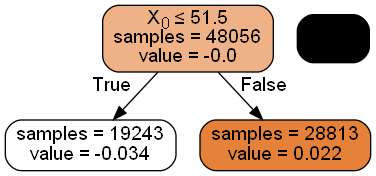

In [43]:
sub_tree_42 = clf.estimators_[42, 0]

from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False,
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

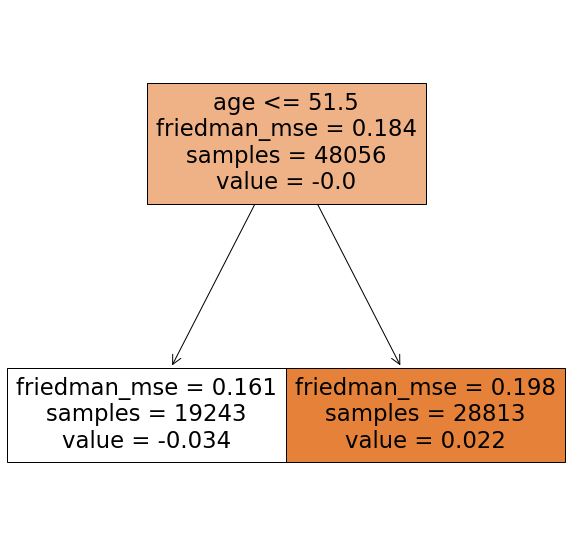

In [24]:
from sklearn import tree

plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf.estimators_[42, 0], feature_names=data_train.columns, filled=True)
plt.show()